<a href="https://colab.research.google.com/github/Ssurf777/DL_from_scratch/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [ ]:
def init_centroid(X, k, n_data):
    # データからセントロイドとなる点をk個ランダムに選択
    idx = np.random.permutation(n_data)[:k] # index選択 重複なく選択
    centroids = X[idx]
    return centroids

def compute_distance(X, k, n_data, centroids):
    distances = np.zeros((n_data, k))
    for idx_centroids in range(k):
        dist = np.sqrt( ( np.sum((X - centroids[idx_centroids])**2, axis=1) ) ) # ユークリッド距離の算出
        distances[:, idx_centroids] = dist
    return distances

def k_means(X, k, max_iter=300):
    """
    X.shape = (データ数, 次元数)
    k = クラスタ数
    """
    n_data, n_features = X.shape

    # centroidの初期化
    centroids = init_centroid(X, k, n_data)

    # 新しいクラスタを格納するための配列定義
    new_cluster = np.zeros(n_data)

    # 各データが所属するクラスタを保存する配列定義
    cluster = np.zeros(n_data)

    for epoch in range(max_iter):
        # 各データテントセントロイドとの距離を計算
        distances = compute_distance(X, k, n_data,
                                     centroids)
        # 新たな所属クラスタを計算
        new_cluster = np.argmin(distances, axis=1) # 問

        # すべてのクラスタに対してセントロイドを再計算
        for idx_centroids in range(k):
            # クラスタ idx_centroids に属するデータポイントの平均を計算し、その平均を新しいセントロイドの位置として更新
            centroids[idx_centroids] = X[new_cluster == idx_centroids].mean(axis=0)

        if (new_cluster == cluster).all():
            break
        cluster = new_cluster
    return cluster

# centorids[idx_centroids]におけるaxis指示について
* axis=0 は 行方向 に沿って平均を計算することを意味します。これにより、各列（特徴量）ごとの平均値 を得ることができます。具体的には、あるクラスタに属する全てのデータポイントの各特徴量（列）を平均して、そのクラスタの新しいセントロイドを決定しています。

* 一方、axis=1 を指定すると、列方向 に沿って平均が計算されます。つまり、各データポイント（行）の特徴量の平均を求めることになります。これは、クラスタリングの文脈では意味がなく、無意味な操作になります。

In [7]:
n_data = np.array([1,2,3,4,5])
#for i in range(len(n_data)):
j = np.random.permutation(n_data)
print(j)
jj = np.random.choice(n_data)
print(jj)

[3 2 4 1 5]
2


# init_centroidの解説

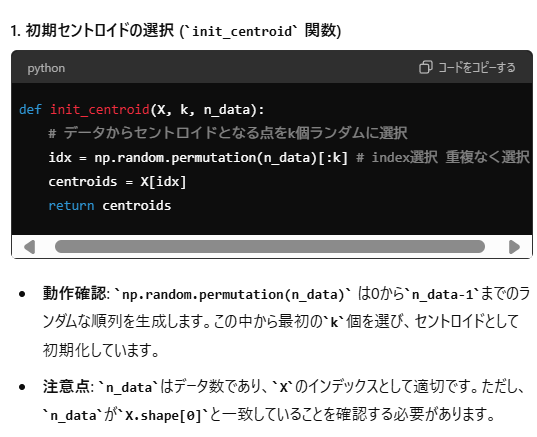

# compute_distanceの解説

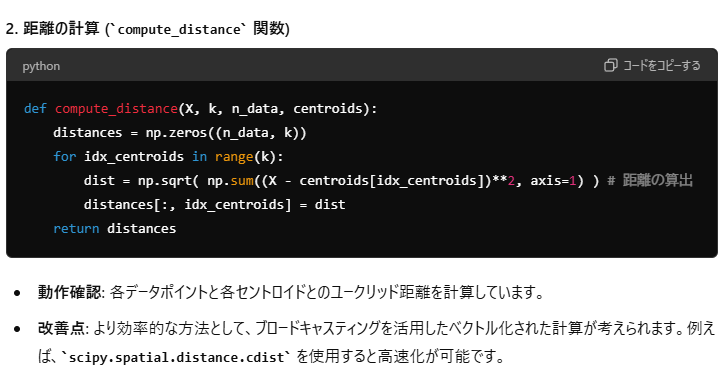

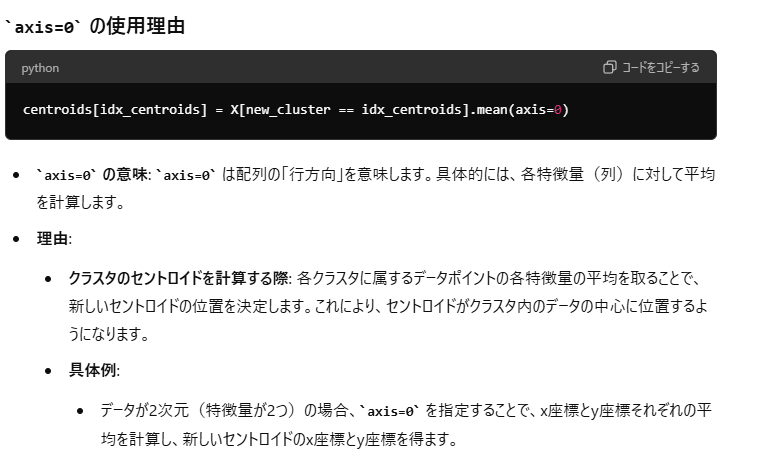

# 全体コード解説

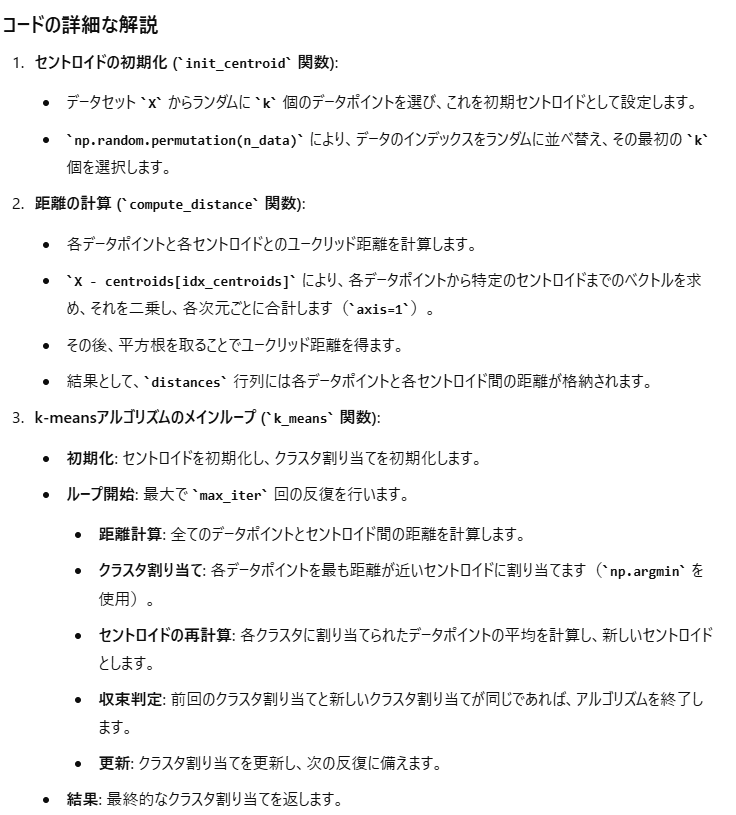

# np.random解説

## np.random.choice
* 説明: 指定した配列からランダムに要素を選びます。replace=False で重複なし、replace=True で重複ありのサンプリングができます。

In [8]:
# 配列からランダムに1つの要素を選択
result1 = np.random.choice([1, 2, 3, 4, 5])
print("Random choice:", result1)

# 配列からランダムに3つの要素を選択（重複なし）
result2 = np.random.choice([1, 2, 3, 4, 5], size=3, replace=False)
print("Random choice without replacement:", result2)

# 配列からランダムに3つの要素を選択（重複あり）
result3 = np.random.choice([1, 2, 3, 4, 5], size=3, replace=True)
print("Random choice with replacement:", result3)

Random choice: 5
Random choice without replacement: [1 3 4]
Random choice with replacement: [3 5 5]


## np.random.permutation
* 説明: 配列をランダムに並べ替えます。

In [9]:
# 配列をランダムに並べ替え
result = np.random.permutation([1, 2, 3, 4, 5])
print("Random permutation:", result)

Random permutation: [4 1 2 5 3]


## np.random.radint
* 説明: 指定した範囲の整数をランダムに生成します。low と high の範囲を指定し、その間の整数が選ばれます。

In [10]:
# 0から9までのランダムな整数を1つ生成
result1 = np.random.randint(0, 10)
print("Random integer:", result1)

# 0から9までのランダムな整数を5つ生成
result2 = np.random.randint(0, 10, size=5)
print("Random integers:", result2)

Random integer: 1
Random integers: [8 9 1 4 5]


## np.random.rand
* 説明: 0から1の間の一様分布に従うランダムな浮動小数点数を生成します。

In [11]:
# 0から1の間のランダムな浮動小数点数を1つ生成
result1 = np.random.rand()
print("Random float:", result1)

# 0から1の間のランダムな浮動小数点数を3x3の配列で生成
result2 = np.random.rand(3, 3)
print("Random floats array:\n", result2)

Random float: 0.5862576895313548
Random floats array:
 [[0.79829573 0.64861064 0.96173684]
 [0.34986815 0.41068359 0.23796126]
 [0.91321778 0.99182695 0.88067724]]
